# 🕸️ Scrapify

<!-- [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YonaniCodes/Scrapify/blob/main/notebooks/scrapify-demo.ipynb) -->


In [49]:
import sys
import os
import re

# Check if running in Colab
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Define repo path
repo_url = "https://github.com/YonaniCodes/Scrapify.git"
repo_path = "/content/Scrapify"

if IN_COLAB:
    # Clone the repo only if it doesn't exist
    if not os.path.exists(repo_path):
        !git clone {repo_url} {repo_path}
    else:
        # Go into the repo and pull the latest changes
        %cd {repo_path}

        # Stash local changes if necessary to avoid conflicts with the pull
        !git stash
        !git pull


    # Add src/ to sys.path
    sys.path.append(f"{repo_path}/src")
else:
    # Local path config for non-Colab environment
    local_src_path = os.path.abspath("../src")
    sys.path.append(local_src_path)

# Import the scraper function from the module


# Call the scrape function (this will print "Scraping..........")



/content/Scrapify
No local changes to save
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 13 (delta 8), reused 9 (delta 6), pack-reused 0 (from 0)
Unpacking objects: 100% (13/13), 2.84 KiB | 161.00 KiB/s, done.
From https://github.com/YonaniCodes/Scrapify
   538b296..8ff0ca0  main       -> origin/main
Updating 538b296..8ff0ca0
Fast-forward
 notebooks/scrapify_demo.ipynb            | 106 +++++++++++++------------------
 src/__pycache__/database.cpython-312.pyc | Bin 3193 -> 3243 bytes
 src/functions.py                         |  12 ++++
 src/scrapify.py                          |  14 +++-
 4 files changed, 69 insertions(+), 63 deletions(-)


In [ ]:
!ls


firebase-adminsdk.json	LICENSE  notebooks  README.md  requirements.txt  src


In [50]:
 !pip install -r requirements.txt
 !pip install langid
 !pip install PyMuPDF


  Using cached asgiref-3.8.1-py3-none-any.whl.metadata (9.3 kB)
  Using cached asttokens-2.4.1-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached blinker-1.8.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
  Using cached comm-0.2.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached contourpy-1.2.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cryptography-44.0.2-cp39-abi3-manylinux_2_34_x86_64.whl.metadata (5.7 kB)
  Using cached debugpy-1.8.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.1 kB)
  Using cached decorator-5.1.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached distlib-0.3.9-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached Django-5.1.3-py3-none-any.whl.metadata (4.2 kB)
  Using cached executing-2.0.1-py2.py3-none

In [51]:
import subprocess

# Get output of ls command
output = subprocess.check_output("ls", shell=True).decode().splitlines()

# Now you can conditionally check
if "firebase-adminsdk.json" in output:
    print("Everything is ready you can start working 🎉🎉🎉🎉")
else:
    print("firebase-adminsdk.json not found.😒😒😒 please ask Yonani for the file")

Everything is ready you can start working 🎉🎉🎉🎉


In [52]:
import sys
sys.path.append('/content/Scrapify/src')

In [73]:
from scrapify import scrape

from scrapify import get_report

In [54]:
get_report()

([],
 [{'url': 'https://storybookscanada.ca/stories/ti/0009/',
   'timestamp': DatetimeWithNanoseconds(2025, 4, 10, 10, 43, 56, 95000, tzinfo=datetime.timezone.utc),
   'reason': 'Input contains amharic chracter but not amaharic languge.'},
  {'url': 'https://osdao.gov.et/wp-content/uploads/2024/04/1243_2013_NEW-COMMERCIAL-CODE-OFFICIAL-AMHARIC-VERSION.pdf',
   'timestamp': DatetimeWithNanoseconds(2025, 4, 10, 11, 47, 0, 504000, tzinfo=datetime.timezone.utc),
   'reason': 'HTTPSConnectionPool(host=\'osdao.gov.et\', port=443): Max retries exceeded with url: /wp-content/uploads/2024/04/1243_2013_NEW-COMMERCIAL-CODE-OFFICIAL-AMHARIC-VERSION.pdf (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb6c1b14c90>: Failed to resolve \'osdao.gov.et\' ([Errno -2] Name or service not known)"))'},
  {'url': 'https://osdao.gov.et/wp-content/uploads/2024/04/Civil-Code-Amharic.pdf',
   'timestamp': DatetimeWithNanoseconds(2025, 4, 10, 11, 35, 11, 573000, tzinfo=datetime.ti

In [55]:
!pip install googlesearch-python

In [56]:

from googlesearch import search

In [57]:
def get_links_from_simple_search(query):
    urls=list(set(search(query, num_results=10)))
    return urls

In [70]:
simple_query = "site:gov.et 'law' OR 'legal' OR 'የፍትህ' OR 'የኢትዮጵያ ሕግ' OR 'የፌዴራል ሕጎች' OR 'አዲስ ሕግ' OR 'አዲስ ደንብ'"
urls=get_links_from_simple_search(simple_query)


In [59]:
scrape(urls,"Biruk")

Processing: https://acso.gov.et/wp-content/uploads/2021/06/Federal-Negarit-Gazette-1113.pdf


/usr/local/lib/python3.11/dist-packages/google/cloud/firestore_v1/base_collection.py:303: UserWarning: Detected filter using positional arguments. Prefer using the 'filter' keyword argument instead.
  return query.where(field_path, op_string, value)


Saved 1 records to data/extracted_data.jsonl
✅ Successfully registered: https://acso.gov.et/wp-content/uploads/2021/06/Federal-Negarit-Gazette-1113.pdf
Processing: http://www.moa.gov.et/wp-content/uploads/2024/07/Definition-of-Powers-and-Duties-of-the-Executive-Organs-Proclamation.pdf
Saved 1 records to data/extracted_data.jsonl
✅ Successfully registered: http://www.moa.gov.et/wp-content/uploads/2024/07/Definition-of-Powers-and-Duties-of-the-Executive-Organs-Proclamation.pdf
Processing: https://www.mofed.gov.et/media/filer_public/42/92/429224ea-fe56-45fb-a4cd-aedf653ba10f/draft_-_vat_regulations_-_amharic-_08152024.pdf
Saved 1 records to data/extracted_data.jsonl
✅ Successfully registered: https://www.mofed.gov.et/media/filer_public/42/92/429224ea-fe56-45fb-a4cd-aedf653ba10f/draft_-_vat_regulations_-_amharic-_08152024.pdf
Processing: https://osdao.gov.et/wp-content/uploads/2024/04/1243_2013_NEW-COMMERCIAL-CODE-OFFICIAL-AMHARIC-VERSION.pdf
⚠️ URL is already registered, skipping.
Process

In [76]:
scraped, unscraped=get_report()

[{'url': 'http://www.moa.gov.et/wp-content/uploads/2024/07/Definition-of-Powers-and-Duties-of-the-Executive-Organs-Proclamation.pdf',
  'scraper': 'unknown',
  'timestamp': DatetimeWithNanoseconds(2025, 4, 10, 11, 34, 40, 124000, tzinfo=datetime.timezone.utc)},
 {'url': 'http://www.mom.gov.et/wp-content/uploads/2020/02/Proc-No.-1113-2019-Organizations-of-Civil-Societies.pdf',
  'scraper': 'unknown',
  'timestamp': DatetimeWithNanoseconds(2025, 4, 10, 11, 35, 10, 217000, tzinfo=datetime.timezone.utc)},
 {'url': 'https://tigraitv.com/%e1%88%98%e1%88%9d%e1%88%85%e1%88%ab%e1%8a%95-%e1%89%b5%e1%8c%8d%e1%88%ab%e1%8b%ad-%e1%8b%98%e1%88%88%e1%8b%8e%e1%88%9d-%e1%8d%80%e1%8c%88%e1%88%9d-%e1%89%b0%e1%8d%83%e1%8b%8a%e1%88%ae%e1%88%9d/',
  'scraper': 'unknown',
  'timestamp': DatetimeWithNanoseconds(2025, 4, 10, 10, 42, 47, 989000, tzinfo=datetime.timezone.utc)},
 {'url': 'https://laws.moj.gov.et/sites/default/files/registry/cae0761a-ef52-48c9-b992-8364128730ec.pdf',
  'scraper': 'unknown',
  'time

In [80]:
import pandas as pd
scraped_data= pd.DataFrame(scraped)

In [65]:
scraped_data

,url,scraper,timestamp
0,https://www.eag.gov.et/Portals/0/Documents/%E1...,Biruk,2025-04-11 06:34:09.651000+00:00
1,https://acso.gov.et/wp-content/uploads/2021/06...,Biruk,2025-04-11 06:31:50.176000+00:00
2,https://www.moa.gov.et/wp-content/uploads/2024...,Biruk,2025-04-11 06:32:47.740000+00:00
3,https://www.mofed.gov.et/media/filer_public/42...,Biruk,2025-04-11 06:32:35.084000+00:00
4,https://laws.moj.gov.et/sites/default/files/re...,Biruk,2025-04-11 06:34:12.914000+00:00
5,http://laws.eag.gov.et/Upload/CassationDecisio...,Biruk,2025-04-11 06:32:42.042000+00:00
6,http://www.moa.gov.et/wp-content/uploads/2024/...,Biruk,2025-04-11 06:32:07.228000+00:00


In [77]:
import pandas as pd
unscraped_data= pd.DataFrame(unscraped)
unscraped

[{'url': 'https://www.fjli.gov.et/training.html',
  'timestamp': DatetimeWithNanoseconds(2025, 4, 11, 7, 5, 56, 838000, tzinfo=datetime.timezone.utc),
  'reason': 'Input contains amharic chracter but not amaharic languge.'},
 {'url': 'https://moe.gov.et/storage/Books/Administrative%20procedure%20proclamation%20(1).pdf',
  'timestamp': DatetimeWithNanoseconds(2025, 4, 11, 6, 32, 59, 362000, tzinfo=datetime.timezone.utc),
  'reason': "HTTPSConnectionPool(host='moe.gov.et', port=443): Max retries exceeded with url: /storage/Books/Administrative%20procedure%20proclamation%20(1).pdf (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7b122997ed10>, 'Connection to moe.gov.et timed out. (connect timeout=10)'))"},
 {'url': 'https://storybookscanada.ca/stories/ti/0009/',
  'timestamp': DatetimeWithNanoseconds(2025, 4, 10, 10, 43, 56, 95000, tzinfo=datetime.timezone.utc),
  'reason': 'Input contains amharic chracter but not amaharic languge.'},
 {'url': 'https://osdao.

In [78]:
unscraped_data.timestamp=pd.to_datetime(unscraped_data.timestamp)
unscraped_data

,url,timestamp,reason
0,https://www.fjli.gov.et/training.html,2025-04-11 07:05:56.838000+00:00,Input contains amharic chracter but not amahar...
1,https://moe.gov.et/storage/Books/Administrativ...,2025-04-11 06:32:59.362000+00:00,"HTTPSConnectionPool(host='moe.gov.et', port=44..."
2,https://storybookscanada.ca/stories/ti/0009/,2025-04-10 10:43:56.095000+00:00,Input contains amharic chracter but not amahar...
3,https://osdao.gov.et/wp-content/uploads/2024/0...,2025-04-10 11:47:00.504000+00:00,"HTTPSConnectionPool(host='osdao.gov.et', port=..."
4,https://osdao.gov.et/wp-content/uploads/2024/0...,2025-04-10 11:35:11.573000+00:00,"HTTPSConnectionPool(host='osdao.gov.et', port=..."
5,https://www.e-consultation.gov.et/draft/3,2025-04-11 07:06:07.597000+00:00,Input contains amharic chracter but not amahar...


Great! 😊 Don't forget to ask me if you have any questions! You can always reach out to me here on Telegram: ✈️ [YonaYonani](https://t.me/YonaYonani)

In [88]:
simple_query = "site:gov.et 'ሕግ' OR 'የፍትህ' OR 'አዲስ ደንብ' OR 'አዲስ ሕግ' OR 'ስርዓት' OR 'የኢትዮጵያ ሕግ' OR 'ፖሮክሌማት' OR 'ተደንብ' OR 'አካባቢ ሕግ'"

urls = get_links_from_simple_search(simple_query)

# Assuming scraped_data and unscraped_data are pandas DataFrames with a 'url' column
filtered_urls = []
for url in urls:
    # Check if the URL is NOT in both scraped_data.url and unscraped_data.url
    if url not in scraped_data['url'].values and url not in unscraped_data['url'].values:
        filtered_urls.append(url)





In [89]:

print(filtered_urls)

['https://www.moj.gov.et/about/message-from-the-minister/', 'https://www.moj.gov.et/', 'https://www.fjli.gov.et/', 'https://www.fjli.gov.et/news/news.html', 'https://e-consultation.gov.et/draft/2', 'https://www.moj.gov.et/department/state-minister-for-governments-legal-and-justice-sector/legal-awareness-education-and-training-directorate/', 'https://www.moj.gov.et/department/state-minister-for-governments-legal-and-justice-sector/legal-studies-drafting-and-consolidation-directorate-general/']


In [90]:
scrape(filtered_urls, "Yonas Awoke")

Processing: https://www.moj.gov.et/about/message-from-the-minister/


/usr/local/lib/python3.11/dist-packages/google/cloud/firestore_v1/base_collection.py:303: UserWarning: Detected filter using positional arguments. Prefer using the 'filter' keyword argument instead.
  return query.where(field_path, op_string, value)


Saved 1 records to data/extracted_data.jsonl
✅ Successfully registered: https://www.moj.gov.et/about/message-from-the-minister/
Processing: https://www.moj.gov.et/
❌ Error at extraction: HTTPSConnectionPool(host='www.moj.gov.et', port=443): Read timed out. (read timeout=10)
✅ Successfully unscraped web registered: https://www.moj.gov.et/
Processing: https://www.fjli.gov.et/
✅ Successfully unscraped web registered: https://www.fjli.gov.et/
Processing: https://www.fjli.gov.et/news/news.html
✅ Successfully unscraped web registered: https://www.fjli.gov.et/news/news.html
Processing: https://e-consultation.gov.et/draft/2
✅ Successfully unscraped web registered: https://e-consultation.gov.et/draft/2
Processing: https://www.moj.gov.et/department/state-minister-for-governments-legal-and-justice-sector/legal-awareness-education-and-training-directorate/
Saved 1 records to data/extracted_data.jsonl
✅ Successfully registered: https://www.moj.gov.et/department/state-minister-for-governments-legal-

In [81]:
 scraped_data

,url,scraper,timestamp
0,https://www.eag.gov.et/Portals/0/Documents/%E1...,Biruk,2025-04-11 06:34:09.651000+00:00
1,http://laws.eag.gov.et/,Yonas Awoke,2025-04-11 07:06:01.584000+00:00
2,https://acso.gov.et/wp-content/uploads/2021/06...,Biruk,2025-04-11 06:31:50.176000+00:00
3,https://www.moa.gov.et/wp-content/uploads/2024...,Biruk,2025-04-11 06:32:47.740000+00:00
4,https://laws.moj.gov.et/,Yonas Awoke,2025-04-11 07:06:05.322000+00:00
5,https://www.mofed.gov.et/media/filer_public/42...,Biruk,2025-04-11 06:32:35.084000+00:00
6,https://laws.moj.gov.et/sites/default/files/re...,Biruk,2025-04-11 06:34:12.914000+00:00
7,http://laws.eag.gov.et/Upload/CassationDecisio...,Biruk,2025-04-11 06:32:42.042000+00:00
8,http://www.moa.gov.et/wp-content/uploads/2024/...,Biruk,2025-04-11 06:32:07.228000+00:00


In [92]:
scrape(["https://www.moj.gov.et/department/state-minister-for-governments-legal-and-justice-sector/legal-studies-drafting-and-consolidation-directorate-general/"],"Yonas Awoke")

Processing: https://www.moj.gov.et/department/state-minister-for-governments-legal-and-justice-sector/legal-studies-drafting-and-consolidation-directorate-general/


/usr/local/lib/python3.11/dist-packages/google/cloud/firestore_v1/base_collection.py:303: UserWarning: Detected filter using positional arguments. Prefer using the 'filter' keyword argument instead.
  return query.where(field_path, op_string, value)


⚠️ URL is already registered, skipping.


In [97]:
scrape(["https://www.fjli.gov.et/training.html"],"Yonas Awoke")

Processing: https://www.fjli.gov.et/training.html


/usr/local/lib/python3.11/dist-packages/google/cloud/firestore_v1/base_collection.py:303: UserWarning: Detected filter using positional arguments. Prefer using the 'filter' keyword argument instead.
  return query.where(field_path, op_string, value)


✅ Successfully unscraped web registered: https://www.fjli.gov.et/training.html


# **Lets visualize our scraping status**

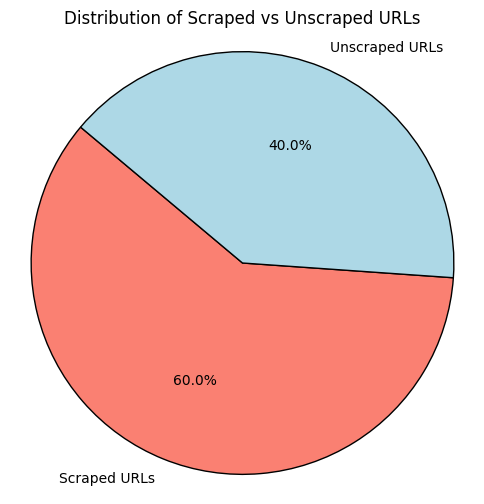

In [95]:
import matplotlib.pyplot as plt

# Example data for scraped and unscraped URLs (you should replace these with your actual data)
scraped_urls = scraped_data.url
unscraped_urls = unscraped_data.url

# Calculate the number of scraped and unscraped URLs
scraped_count = len(scraped_urls)
unscraped_count = len(unscraped_urls)

# Data for the pie chart
labels = ['Scraped URLs', 'Unscraped URLs']
sizes = [scraped_count, unscraped_count]
colors = ['salmon', 'lightblue']  # Green for scraped, red for unscraped

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Distribution of Scraped vs Unscraped URLs')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()
